In [100]:
from littlefish.visulization import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [101]:
simulation_folder = r"F:\little_fish_simulation_logs_8eyes_no_hidden"
min_generation = 45
max_generation = 53

population_size = 1000
turnover_rate = 0.6

mother_fish_num = int(population_size * (1 - turnover_rate))

In [102]:
life_span_df = plotting.collect_life_spans(
    simulation_folder,
    min_generation=min_generation,  # 0
    max_generation=max_generation,  # 25
)

reading generation_0000045, 1 / 9 ...
reading generation_0000046, 2 / 9 ...
reading generation_0000047, 3 / 9 ...
reading generation_0000048, 4 / 9 ...
reading generation_0000049, 5 / 9 ...
reading generation_0000050, 6 / 9 ...
reading generation_0000051, 7 / 9 ...
reading generation_0000052, 8 / 9 ...
reading generation_0000053, 9 / 9 ...


In [103]:
life_span_df.sort_values(by="life_span")

,generation,fish_name,life_span,is_from_last_geneartion
7628,52,fish_241218_10_58_37.247168,27.6,False
8525,53,fish_241218_11_24_15.174232,31.3,False
8876,53,fish_241218_11_24_30.258427,32.4,False
7885,52,fish_241218_10_58_49.497230,33.4,False
6855,51,fish_241218_10_28_17.452458,35.6,False
...,...,...,...,...
8,45,fish_241218_02_56_19.225719,2979.1,True
4424,49,fish_241218_08_28_56.510039,3011.4,False
1349,46,fish_241218_06_03_26.590857,3034.5,False
2082,47,fish_241218_06_03_24.548066,3130.5,True


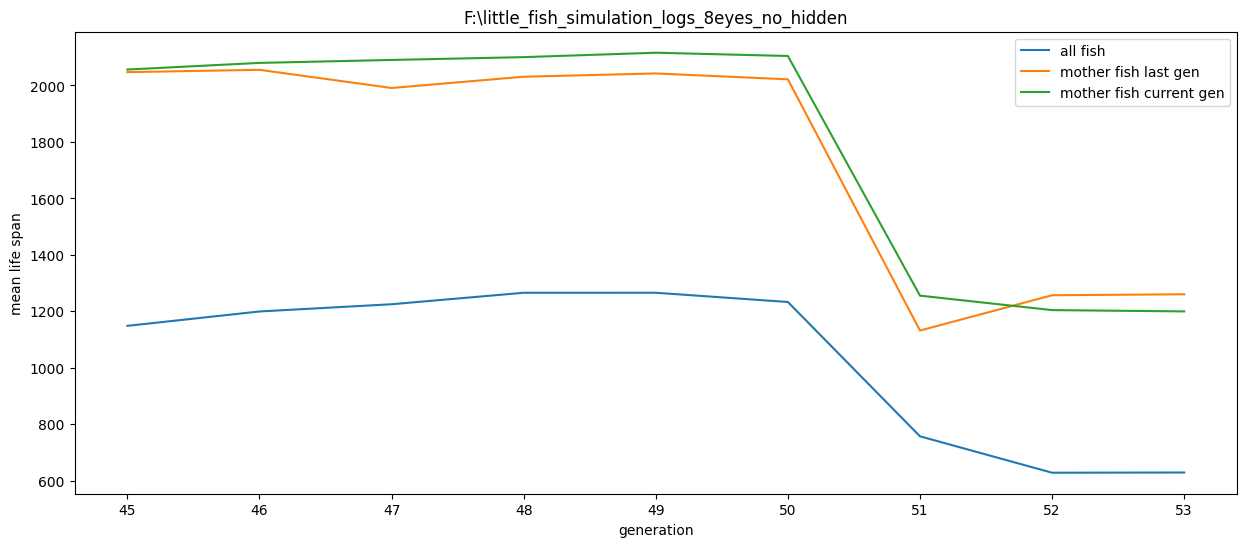

In [104]:
gens = sorted(life_span_df["generation"].unique())
mean_life_span = []
mean_mo_life_last_gen = []
mean_mo_life_curr_gen = []
for gen in gens:
    curr_life_span = sorted(life_span_df.query("generation == @gen")["life_span"])
    mean_life_span.append(np.mean(curr_life_span))
    mean_mo_life_last_gen.append(np.mean(life_span_df.query("generation == @gen and is_from_last_geneartion")["life_span"]))
    mean_mo_life_curr_gen.append(np.mean(curr_life_span[-mother_fish_num:]))

f, ax = plt.subplots(figsize=(15, 6))
ax.plot(gens, mean_life_span, label="all fish")
ax.plot(gens, mean_mo_life_last_gen, label="mother fish last gen")
ax.plot(gens, mean_mo_life_curr_gen, label="mother fish current gen")
ax.set_xlabel("generation")
ax.set_ylabel("mean life span")
ax.set_title(simulation_folder)
ax.legend()

(0.0, 4000.0)

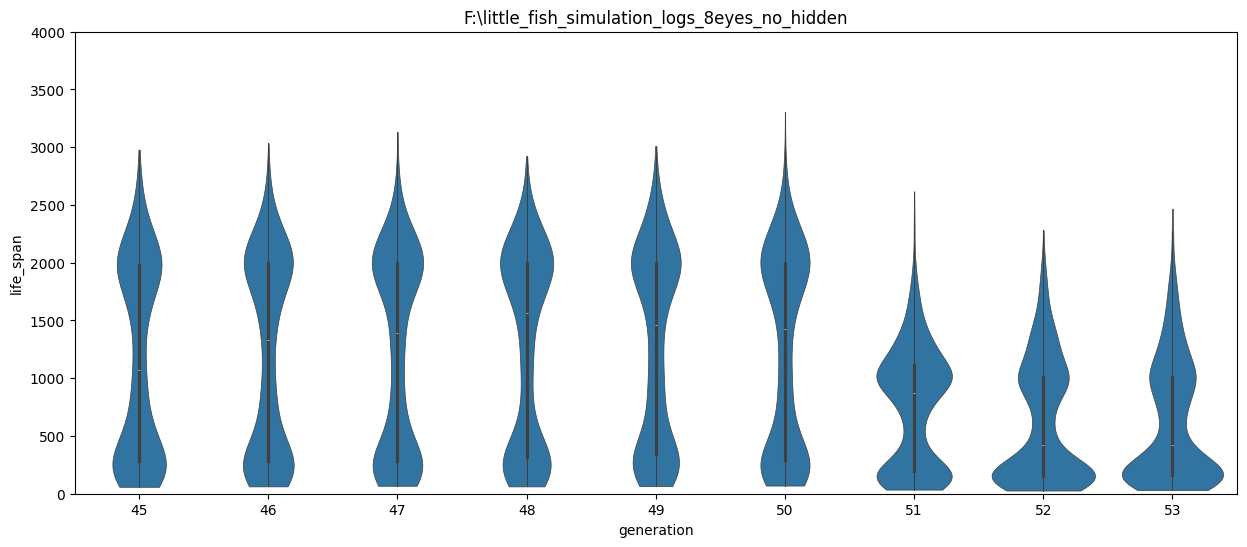

In [105]:
f, ax = plt.subplots(figsize=(15, 6))
ax.set_title(simulation_folder)
sns.violinplot(
    data=life_span_df, x="generation", y="life_span", ax=ax, cut=0, linewidth=0.5,
)
ax.set_ylim([0, 4000])

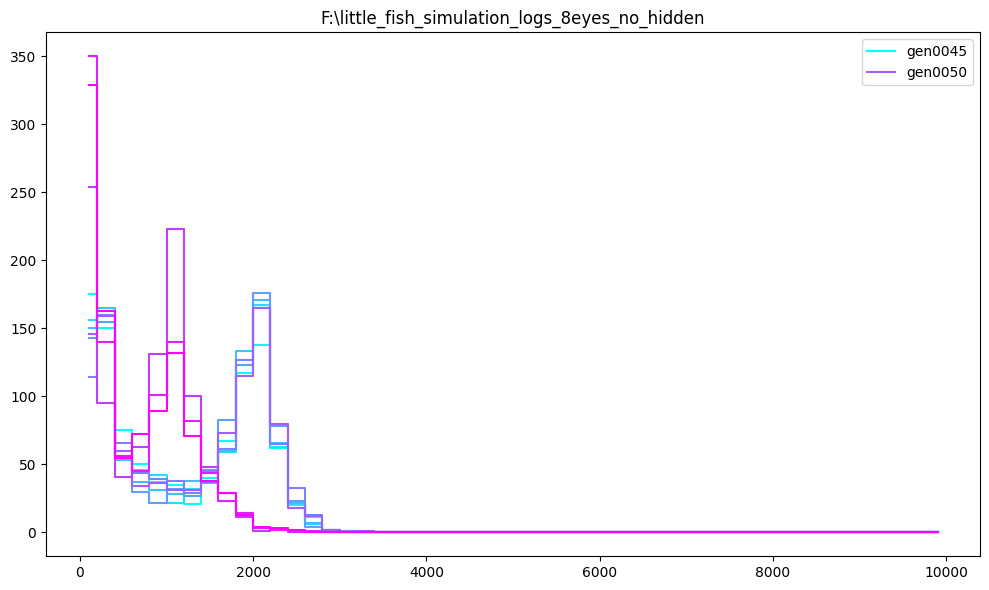

In [106]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_title(simulation_folder)
plotting.plot_simulation_life_spans(
    life_span_df, ax, max_life_span=10000, bins=50, legend_gap=5, 
)
ax.legend()
plt.tight_layout()